In [ ]:
import pytz
import datetime
import marimo as mo

india_timezone = pytz.timezone("Asia/Kolkata")
now = datetime.datetime.now(india_timezone)

curr = now.strftime("%Y-%m-%d, %I:%M:%S %p %Z")

mo.md(
    rf"""
# Week - 3

**Submission Date:** `2025-10-12, 23:59 IST`

**Last Updated:** `{curr}`
"""
)

In [ ]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_selection import (
    VarianceThreshold,
    RFE,
    SequentialFeatureSelector,
)
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv("Week-3/Graded Assignment/dataset.csv")

In [ ]:
df.replace("?", np.nan, inplace=True)

In [ ]:
X = df.drop("Target", axis=1)
y = df["Target"]

In [ ]:
df["V1"] = pd.to_numeric(df["V1"], errors="coerce")
df["V2"] = pd.to_numeric(df["V2"], errors="coerce")

In [ ]:
df.info()

In [ ]:
df["V1"].mean()

In [ ]:
df.head()

## Question 1

How many features remain after applying following pipeline to the feature matrix?

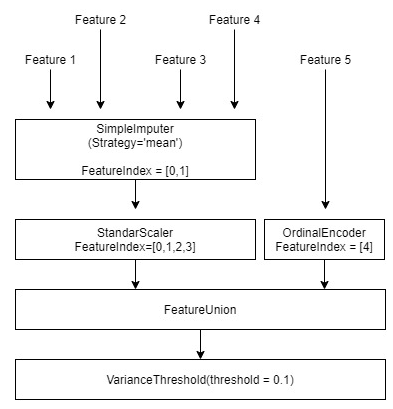

In [ ]:
preprocess = ColumnTransformer(
    [
        (
            "num_impute_scale",
            Pipeline(
                [
                    ("impute", SimpleImputer(strategy="mean")),
                    ("scale", StandardScaler()),
                ]
            ),
            [0, 1],
        ),
        ("num_scale_only", StandardScaler(), [2, 3]),
        ("cat_encode", OrdinalEncoder(), [4]),
    ]
).set_output(transform="pandas")

pipe1 = Pipeline(
    [("features", preprocess), ("variance_filter", VarianceThreshold(0.1))]
).set_output(transform="pandas")

pipe1

In [ ]:
_X = pipe1.fit_transform(X)
_X.shape[1]

In [ ]:
pipe2 = Pipeline([("features", preprocess)]).set_output(transform="pandas")

pipe1

## Question 2

What are the two most important features computed by RFE?

Preprocess the data using pipeline shown in the diagram. Use LogisticRegression (with default parameters) for the estimator. Encode target variable via ordinal encoding.

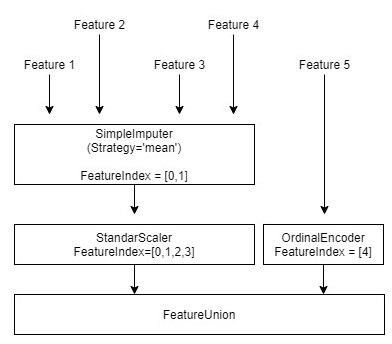

In [ ]:
_X = pipe2.fit_transform(X)
_y = OrdinalEncoder().fit_transform(df[["Target"]])

_lr = LogisticRegression()

rfe = RFE(_lr, n_features_to_select=2)
rfe.fit_transform(_X, y)

X.columns[[i for i, j in enumerate(rfe.ranking_) if j == 1]]

## Question 3

What are the indices of two most important features computed by SFS (forward)?

Preprocess the data using pipeline shown in the diagram.Use LogisticRegression (with  default parameters) for the estimator. Encode target variable via ordinal encoding.

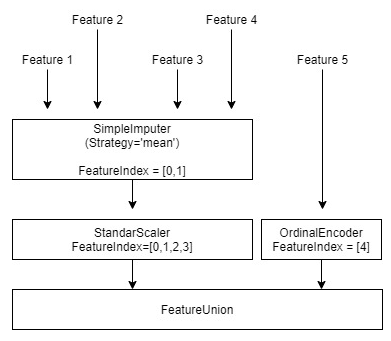

In [ ]:
_X = pipe2.fit_transform(X)
_y = OrdinalEncoder().fit_transform(df[["Target"]])

_lr = LogisticRegression()

_sfs = SequentialFeatureSelector(
    _lr, n_features_to_select=2, direction="forward"
)
_sfs.fit_transform(_X, y)

X.columns[[i for i, j in enumerate(_sfs.support_) if j]]

## Question 4

What are the indices of two most important features computed by SFS (backward)?

Preprocess the data using pipeline shown in the diagram. Use LogisticRegression (with default parameters) for the estimator. Encode target variable via ordinal encoding.

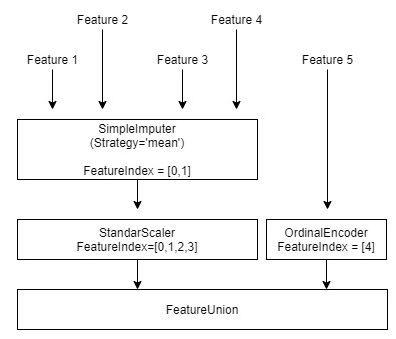

In [ ]:
_X = pipe2.fit_transform(X)
_y = OrdinalEncoder().fit_transform(df[["Target"]])

_lr = LogisticRegression()

_sfs = SequentialFeatureSelector(
    _lr, n_features_to_select=2, direction="backward"
)
_sfs.fit_transform(_X, y)

X.columns[[i for i, j in enumerate(_sfs.support_) if j]]